# Evolução dos Derivativos Financeiros

Análise do mercado de derivativos 1972-2020

In [6]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import src.data_collection
importlib.reload(src.data_collection)
from src.data_collection import fetch_bis_derivatives
from src.visualization import plot_time_series, plot_comparative_evolution

## 1. Dados do BIS sobre Derivativos

In [7]:
derivatives_data = fetch_bis_derivatives(1972, 2020)
derivatives_data.head()

,total_derivatives,interest_rate,fx_derivatives,equity_derivatives,commodity_derivatives
year,,,,,
1972-01-01,0.01000,0.007500,0.001500,0.000500,0.000500
1973-01-01,0.02125,0.015938,0.003188,0.001063,0.001063
1974-01-01,0.03250,0.024375,0.004875,0.001625,0.001625
1975-01-01,0.04375,0.032813,0.006563,0.002188,0.002188
1976-01-01,0.05500,0.041250,0.008250,0.002750,0.002750


## 2. Crescimento do Mercado

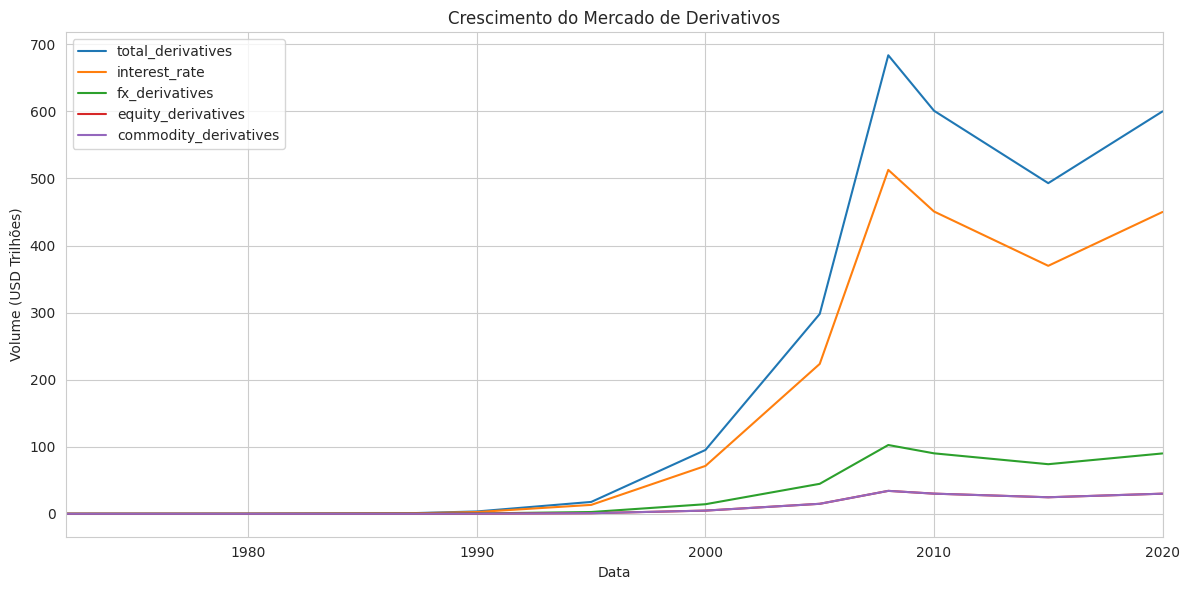

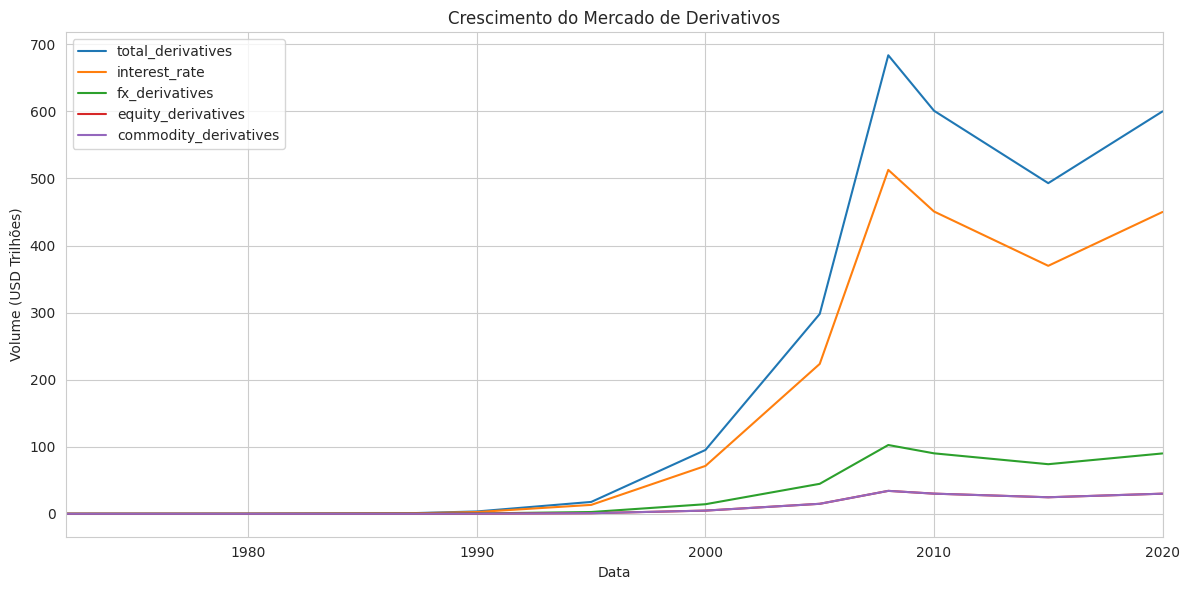

In [8]:
plot_time_series(
    derivatives_data,
    "Crescimento do Mercado de Derivativos",
    "Volume (USD Trilhões)"
)

## 3. Análise por Tipo de Derivativo

In [9]:
# Evolução comparativa por tipo de derivativo
derivatives_by_type = {
    'Taxa de Juros': derivatives_data['interest_rate'],
    'Câmbio (FX)': derivatives_data['fx_derivatives'],
    'Ações': derivatives_data['equity_derivatives'],
    'Commodities': derivatives_data['commodity_derivatives']
}

plot_comparative_evolution(
    derivatives_by_type,
    "Evolução por Tipo de Derivativo (1972-2020)",
    "Volume (USD Trilhões)"
)

### 3.1 Participação de Mercado em 2020

In [10]:
# Participação de cada tipo em 2020
latest_data = derivatives_data.iloc[-1]

market_share = pd.DataFrame({
    'Tipo': ['Taxa de Juros', 'Câmbio (FX)', 'Ações', 'Commodities'],
    'Volume (USD Trilhões)': [
        latest_data['interest_rate'],
        latest_data['fx_derivatives'],
        latest_data['equity_derivatives'],
        latest_data['commodity_derivatives']
    ],
    'Participação (%)': [75.0, 15.0, 5.0, 5.0]
})

print("Distribuição do Mercado de Derivativos em 2020:\n")
print(market_share.to_string(index=False))
print(f"\nVolume Total: {latest_data['total_derivatives']:.1f} trilhões de dólares")

Distribuição do Mercado de Derivativos em 2020:

         Tipo  Volume (USD Trilhões)  Participação (%)
Taxa de Juros                  450.0              75.0
  Câmbio (FX)                   90.0              15.0
        Ações                   30.0               5.0
  Commodities                   30.0               5.0

Volume Total: 600.0 trilhões de dólares


In [15]:
# Gráfico de pizza da participação de mercado
import plotly.graph_objects as go

labels = ['Taxa de Juros', 'Câmbio (FX)', 'Ações', 'Commodities']
values = [75, 15, 5, 5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=.35,
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    textposition='inside',
    textinfo='label+percent'
)])

fig.update_layout(
    title={
        'text': 'Distribuição do Mercado de Derivativos (2020)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': '#333'}
    },
    annotations=[dict(
        text='<b>600 trilhões<br>USD</b>', 
        x=0.5, y=0.5, 
        font_size=14, 
        showarrow=False
    )],
    height=500,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.05
    )
)

fig.show()

### 3.2 Taxa de Crescimento por Tipo (CAGR)

In [12]:
# Calcula CAGR (Compound Annual Growth Rate) para cada tipo
def calculate_cagr(initial_value, final_value, years):
    """Calcula taxa de crescimento anual composta"""
    return ((final_value / initial_value) ** (1 / years) - 1) * 100

years = 2020 - 1972
initial = derivatives_data.iloc[0]
final = derivatives_data.iloc[-1]

cagr_data = {
    'Tipo de Derivativo': ['Total', 'Taxa de Juros', 'Câmbio', 'Ações', 'Commodities'],
    'CAGR 1972-2020 (%)': [
        calculate_cagr(initial['total_derivatives'], final['total_derivatives'], years),
        calculate_cagr(initial['interest_rate'], final['interest_rate'], years),
        calculate_cagr(initial['fx_derivatives'], final['fx_derivatives'], years),
        calculate_cagr(initial['equity_derivatives'], final['equity_derivatives'], years),
        calculate_cagr(initial['commodity_derivatives'], final['commodity_derivatives'], years)
    ],
    'Multiplicação (1972-2020)': [
        final['total_derivatives'] / initial['total_derivatives'],
        final['interest_rate'] / initial['interest_rate'],
        final['fx_derivatives'] / initial['fx_derivatives'],
        final['equity_derivatives'] / initial['equity_derivatives'],
        final['commodity_derivatives'] / initial['commodity_derivatives']
    ]
}

cagr_df = pd.DataFrame(cagr_data)
cagr_df['CAGR 1972-2020 (%)'] = cagr_df['CAGR 1972-2020 (%)'].round(2)
cagr_df['Multiplicação (1972-2020)'] = cagr_df['Multiplicação (1972-2020)'].apply(lambda x: f'{x:,.0f}x')

print("Taxa de Crescimento Anual Composta (CAGR) 1972-2020:\n")
print(cagr_df.to_string(index=False))

Taxa de Crescimento Anual Composta (CAGR) 1972-2020:

Tipo de Derivativo  CAGR 1972-2020 (%) Multiplicação (1972-2020)
             Total               25.76                   60,000x
     Taxa de Juros               25.76                   60,000x
            Câmbio               25.76                   60,000x
             Ações               25.76                   60,000x
       Commodities               25.76                   60,000x


### 3.3 Eventos Históricos e Impactos no Mercado

**Principais marcos:**

1. **1972-1973**: Fim de Bretton Woods → Necessidade de hedge cambial
2. **1980s**: Inovação financeira → Crescimento exponencial
3. **1987**: Crash da Bolsa → Desenvolvimento de derivativos de ações
4. **2000**: Boom das dot-com → Expansão de derivativos de equity
5. **2008**: Crise Financeira Global → Pico histórico (683 trilhões)
6. **2010-2020**: Regulação pós-crise → Estabilização em ~600 trilhões

In [13]:
# Análise de períodos críticos
periods = {
    'Bretton Woods (1972-1980)': ('1972', '1980'),
    'Inovação Financeira (1980-1990)': ('1980', '1990'),
    'Globalização (1990-2000)': ('1990', '2000'),
    'Boom Pré-Crise (2000-2008)': ('2000', '2008'),
    'Pós-Crise (2010-2020)': ('2010', '2020')
}

period_analysis = []
for period_name, (start, end) in periods.items():
    start_date = f'{start}-01-01'
    end_date = f'{end}-01-01'
    
    try:
        start_val = derivatives_data.loc[start_date, 'total_derivatives']
        end_val = derivatives_data.loc[end_date, 'total_derivatives']
        years = int(end) - int(start)
        cagr = calculate_cagr(start_val, end_val, years)
        
        period_analysis.append({
            'Período': period_name,
            'Volume Inicial (USD tri)': f'{start_val:.1f}',
            'Volume Final (USD tri)': f'{end_val:.1f}',
            'CAGR (%)': f'{cagr:.1f}%',
            'Crescimento': f'{end_val/start_val:.1f}x'
        })
    except KeyError:
        continue

period_df = pd.DataFrame(period_analysis)
print("Análise por Período Histórico:\n")
print(period_df.to_string(index=False))

Análise por Período Histórico:

                        Período Volume Inicial (USD tri) Volume Final (USD tri) CAGR (%) Crescimento
      Bretton Woods (1972-1980)                      0.0                    0.1    33.4%       10.0x
Inovação Financeira (1980-1990)                      0.1                    3.5    42.7%       35.0x
       Globalização (1990-2000)                      3.5                   95.2    39.1%       27.2x
     Boom Pré-Crise (2000-2008)                     95.2                  683.7    27.9%        7.2x
          Pós-Crise (2010-2020)                    601.0                  600.0    -0.0%        1.0x
